In [1]:
# Cupy vs Numpy: Matrix Multiplication 
# CPU: dual E5-2630, 64Gb, GPU: p4000 

import cupy as cp
import numpy as np
import time
from matplotlib import pyplot as plt

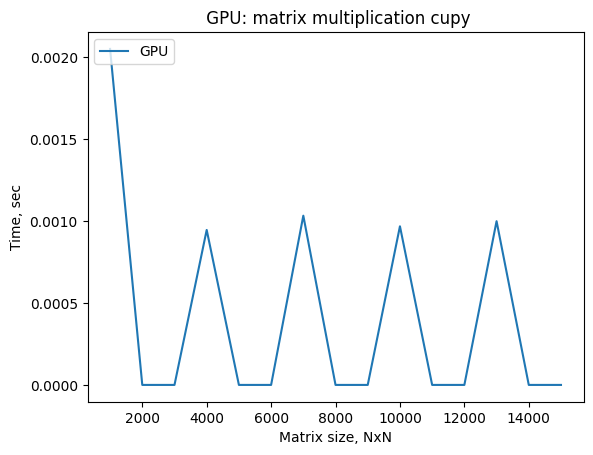

In [2]:
Num = 16000

cp_time = []
cp_N    = []
np_time = []

def cupy_multiplication(N):
    time_start = time.time()
    A = cp.random.rand(N,N).astype(cp.float32)
    B = cp.random.rand(N,N).astype(cp.float32)
    AA = cp.dot(A,B)
    time_end = time.time()
    return (time_end-time_start)

def numpy_multiplication(N):
    time_start = time.time()
    A = np.random.rand(N,N).astype(cp.float32)
    B = np.random.rand(N,N).astype(cp.float32)
    AA = np.dot(A,B)
    time_end = time.time()
    return(time_end-time_start)

# Warming up GPU
cp_exection_time     = cupy_multiplication(15000)
cp_exection_time     = cupy_multiplication(15000)
cp.cuda.Device(0).synchronize()

# GPU
for i in range(1000, Num, 1000):
    cp_exection_time     = cupy_multiplication(i)
    cp_time.append(cp_exection_time)
    cp_N.append(i)

# Plotting
plt.plot(cp_N, cp_time, label = 'GPU')
plt.xlabel("Matrix size, NxN")
plt.ylabel("Time, sec")
plt.title(" GPU: matrix multiplication cupy")
plt.legend(loc="upper left")
plt.show()


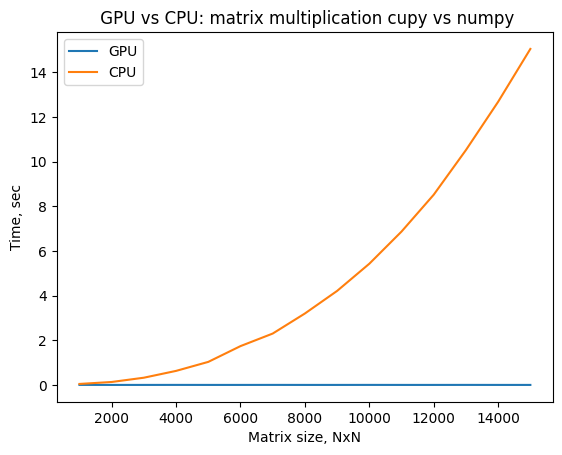

In [3]:
# CPU
for j in range(1000, Num, 1000):
    np_exection_time    = numpy_multiplication(j)
    np_time.append(np_exection_time)

# Plotting
plt.plot(cp_N, cp_time, label = 'GPU')
plt.plot(cp_N, np_time, label = 'CPU')
plt.xlabel("Matrix size, NxN")
plt.ylabel("Time, sec")
plt.title(" GPU vs CPU: matrix multiplication cupy vs numpy")
plt.legend(loc="upper left")
plt.show()